# OpenCVを利用した葉面積の推定
- [このページのJupyter Notebookファイル](https://amano-takahisa.github.io/rs_with_python/handson/leaf_area_index.ipynb)
- [google colaboratoryで開く](https://colab.research.google.com/github/amano-takahisa/rs_with_python/blob/master/docs/handson/leaf_area_index.ipynb)
- [画像データ](https://github.com/amano-takahisa/rs_with_python/raw/master/source/handson/data/field.jpg)

Pythonで画像を扱う際に、OpenCVというライブラリがよく利用されます。
今回はこのOpenCVを用いて、作物成長段階の指標となる葉面積を推定します。

まずはOpenCVモジュールを読み込みます。
以下のチャンクを実行すると、今動いているPythonの環境にOpenCVの機能が追加されます。

In [1]:
import cv2

作業しているパソコンにOpenCVがインストールされていない場合は、エラーが出ますので、以下のコマンドでインストールして、再度実行してください。

In [ ]:
!pip install opencv-python

うまくインストールされれば、以下のコマンドでバージョンが表示されます。

In [2]:
cv2.__version__

'4.4.0'

## OpenCVでの画像の表示

まずは画像ファイルをJupyter Notebookに読み込んで表示してみましょう。

画像は、`.ipynb`ファイルと同じフォルダに`data`という名前のフォルダを作成し、その中に保存してください。以下では、[www.pxfuel.com](https://www.pxfuel.com/en/free-photo-qhhuu)から取得した画像を利用しています。

In [3]:
# ファイルへのパスをimage_path変数に代入する。
image_path = 'data/field.jpg'

# 画層をOpenCVのimage形式で読み込む
img = cv2.imread(image_path)

次のチャンクを実行すると、**image**という名前の別ウィンドウが立ち上がり、画像が表示されます。(Jupyter labをWSL2上やGoogle Colaboratoryで動かしている場合、下のコードは機能しないかもしれません。参考:[Can't use X-Server in WSL 2](https://github.com/microsoft/WSL/issues/4106))

表示されたウィンドウは、キーボードのいづれかのキーを押して閉じてください。

In [ ]:
# OpenCV のimshow関数で、画像を表示する
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

うまく実行されれば別ウィンドウで次の画像が表示されます。

![field](https://github.com/amano-takahisa/rs_with_python/raw/master/source/handson/data/field.jpg)

表示されたウィンドウを閉じてもセルの番号が`[*]`と表示されたままの場合は、Jupyter NotebookメニューのKernel -> Restart Kernelで、カーネルを再起動してください。  

画像の表示はこの方法でもいいですが、**matplotlib**というライブラリを利用して、Jupyter Notebook内にインラインで表示させる下記の方法がよく用いられます。

まずはmatplotlibをインポートします。(必要であればmatplotlibを`!pip install matplotlib` からインストールしてください。)

In [4]:
import matplotlib.pyplot as plt

ここでは、`matplotlib`ライブラリ内の`pyploy`というサブモジュールを`plt`という別名でインポートしました。このように別名を使ってインポートすることにより、たとえば`matplotlib.pyplot.imshow()`と書く代わりに、`plt.imshow()`と書くことができるようになります。

import文はプログラムの一番最初にまとめて記述することが慣例ですが、ここでは必要になる箇所で適宜宣言することにします。

では、`matplotlib`の`matshow`関数を使って画像を表示しましょう。

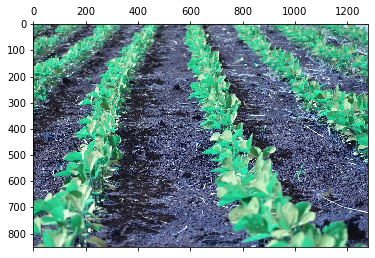

In [5]:
plt.matshow(img)

色が変ですね。

これは、OpenCVとmatplotlibでのデフォルトのRGBチャンネルの順序が異なるため、赤と青が入れ替わってしまっているからです。  
OpenCVはBGRの順、matplotlibはRGBの順でカラーを取り扱います。
正しく読み込むには以下のように読み込みます。

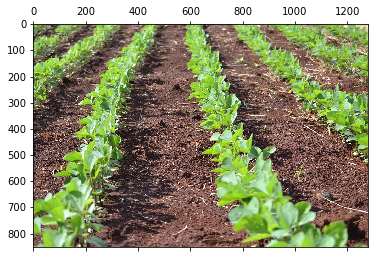

In [6]:
# 画層をRGBの順で読み込む
img_bgr = cv2.imread(image_path)

# cvtColor() 関数でBGRからRGBへ変換する
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# matplotlibで表示
plt.matshow(img_rgb)

`.jpg`ファイルとして保存された写真をPythonで表示することができました。

## 画像データとはなにか
写真や衛星画像のようなデータはラスタデータと呼ばれ、一定の間隔で格子状に区切られた各グリッドに値をもったデータ形式です。それぞれのグリッドのことをピクセルと呼ぶので、ピクセルデータと呼ぶこともあります。上で画像をプロットした際に、X軸とY軸に数値が振られていますが、この数値が画像のピクセルを表しています。通常左上を起点とした座標で表されます。  
ラスタデータと対になるデータはベクタデータです。分野によっては、ベクタデータは、ベクトル、ポリゴンなどとも呼ばれます。

詳しくはESRIのサイトに解説があるので、参考にしてください。

- [ベクターデータとは: www.esrij.com](https://www.esrij.com/gis-guide/gis-datamodel/vector-data/)
- [ラスターデータとは: wwww.esrij.com](https://www.esrij.com/gis-guide/gis-datamodel/raster-data/)

今回読み込んだ画像はラスタデータです。ここではPythonの中でどのように保存されているかを見ていきます。

まずは`cv2.imread()`で読み込んだ`img_bgr`を`print()`関数を用いて表示させてみます。

In [7]:
print(img_bgr)

[[[ 71 205 152]
  [ 68 202 149]
  [ 68 199 148]
  ...
  [ 43  66  92]
  [ 68  95 121]
  [105 136 161]]

 [[ 70 206 154]
  [ 68 204 152]
  [ 64 200 148]
  ...
  [ 58  85 111]
  [ 78 109 134]
  [107 143 167]]

 [[ 67 206 155]
  [ 64 203 152]
  [ 59 198 147]
  ...
  [ 76 113 135]
  [ 85 126 149]
  [102 146 169]]

 ...

 [[187 217 252]
  [191 219 254]
  [181 206 246]
  ...
  [104 120 143]
  [ 98 103 128]
  [ 90  91 117]]

 [[168 197 224]
  [184 210 240]
  [189 214 246]
  ...
  [115 136 157]
  [104 115 137]
  [ 90  96 119]]

 [[150 175 195]
  [163 187 209]
  [167 190 216]
  ...
  [117 142 158]
  [101 116 135]
  [ 82  93 113]]]


`print()`関数によって、画像の中のデータが表示されました。画像データは、整数の値が入ったリストが入れ子になった構造をしていることがわかります。

`type()`関数で、データ型を確認します。

In [8]:
type(img_bgr)

numpy.ndarray

`img_bgr`の実態は、`numpy.ndarray`クラスのデータであることが分かりました。
`numpy.ndarray`クラスは、`shape`プロパティを持つので、これを確認してみます。

In [9]:
img_bgr.shape

(853, 1280, 3)

実は、OpenCVで読みこんんだデータは、各ピクセルにおける輝度が`[青、緑、赤]`の順で保存され、その各ピクセルの値は、画像の左上から右上、さらに上から下の順で3重の入れ子構造で保存されています。そのため、`shape`を確認することで、読み込んだ画像は高さ853ピクセル、幅1280ピクセルのサイズで、3チャンネルの画像であったことがわかりました。

今回の画像の例では、`print()`関数で一行目に表示された`[ 71 205 152]`の値は、左上のピクセルの青色の値が`71`、緑色が`205`、赤色が`152`の値を持っています。値が大きいほど、ディスプレイ上でその色が明るく光るので、このピクセルは緑>赤>青の順の強さで光って、黄緑色であることが推測できます。

`cv2.cvtColor()`関数で変換された`img_rgb`のデータと比べてみましょう。

In [10]:
print(img_rgb)

[[[152 205  71]
  [149 202  68]
  [148 199  68]
  ...
  [ 92  66  43]
  [121  95  68]
  [161 136 105]]

 [[154 206  70]
  [152 204  68]
  [148 200  64]
  ...
  [111  85  58]
  [134 109  78]
  [167 143 107]]

 [[155 206  67]
  [152 203  64]
  [147 198  59]
  ...
  [135 113  76]
  [149 126  85]
  [169 146 102]]

 ...

 [[252 217 187]
  [254 219 191]
  [246 206 181]
  ...
  [143 120 104]
  [128 103  98]
  [117  91  90]]

 [[224 197 168]
  [240 210 184]
  [246 214 189]
  ...
  [157 136 115]
  [137 115 104]
  [119  96  90]]

 [[195 175 150]
  [209 187 163]
  [216 190 167]
  ...
  [158 142 117]
  [135 116 101]
  [113  93  82]]]


`cv2.cvtColor()`によって、赤色の値と青色の値が入れ替えられたことが確認できます。

また、`numpy.array`は以下のようにすることで、データの一部を取り出すことができます。

```Python
array[1軸目の範囲, 2軸目の範囲, 3軸目の範囲, ...]
```

今回の画像データは縦、横、色チャンネルの3次元データです。左上の縦100x横200ピクセルに対応する`img_rgb`は次のように取り出すことができます。

In [11]:
img_rgb[0:100, 0:200, :]  # 3軸目の範囲":" は"すべての範囲"を意味する

array([[[152, 205,  71],
        [149, 202,  68],
        [148, 199,  68],
        ...,
        [125, 144,  89],
        [127, 150,  96],
        [128, 154, 106]],

       [[154, 206,  70],
        [152, 204,  68],
        [148, 200,  64],
        ...,
        [142, 160, 108],
        [143, 163, 112],
        [139, 162, 116]],

       [[155, 206,  67],
        [152, 203,  64],
        [147, 198,  59],
        ...,
        [152, 168, 123],
        [146, 163, 119],
        [135, 156, 113]],

       ...,

       [[147, 187, 101],
        [137, 176,  97],
        [137, 176, 109],
        ...,
        [145, 194,  42],
        [154, 204,  47],
        [168, 219,  54]],

       [[147, 188,  96],
        [142, 182,  96],
        [143, 181, 108],
        ...,
        [150, 199,  45],
        [155, 205,  46],
        [163, 216,  50]],

       [[149, 190,  98],
        [145, 185,  99],
        [143, 180, 110],
        ...,
        [150, 199,  48],
        [150, 201,  46],
        [156, 208,  48]]

この部分だけをプロットしてみましょう。

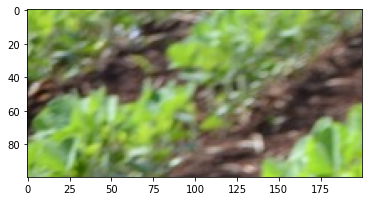

In [12]:
plt.imshow(img_rgb[0:100, 0:200, :])

画像の左上あたりが切り取られていることが確認できました。

## チャンネルの分解

In [13]:
r, g, b = cv2.split(img_rgb)
r.shape

(853, 1280)

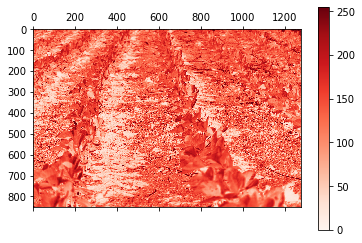

In [14]:
plt.matshow(r, cmap='Reds')
plt.colorbar()
plt.show()

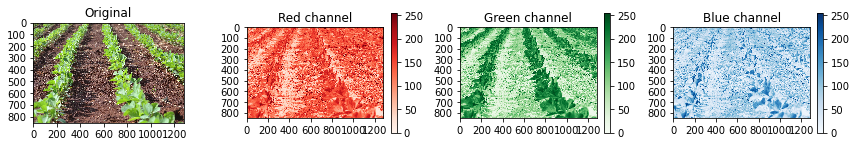

In [15]:
channels = [img_rgb, r, g, b]
colors = (None, 'Reds','Greens','Blues')
titles = ('Original', 'Red channel', 'Green channel', 'Blue channel')

fig, axs = plt.subplots(1, 4, figsize=(12,3))  # figとaxを作成
for idx, (title, channel, color) in enumerate(zip(titles, channels, colors)):
    axs[idx].set_title(title)
    ax = axs[idx].matshow(channel, cmap=color)
    axs[idx].xaxis.tick_bottom()    
    if color:
        fig.colorbar(ax, ax=axs[idx], fraction=0.04)

plt.tight_layout()
plt.show()

## HSVへの変換

In [16]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hsv.shape

(853, 1280, 3)

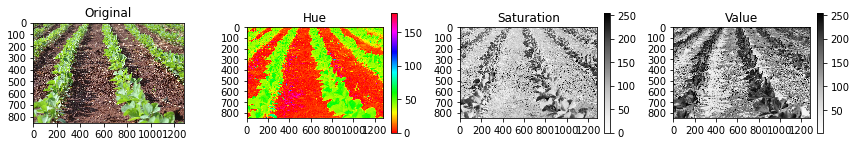

In [17]:
channels = h, s, v = cv2.split(img_hsv)
channels.insert(0, img_rgb)
colors = (None, 'hsv','Greys','Greys')
titles = ('Original', 'Hue', 'Saturation', 'Value')

fig, axs = plt.subplots(1, 4, figsize=(12,3))  # figとaxを作成
for idx, (title, channel, color) in enumerate(zip(titles, channels, colors)):
    axs[idx].set_title(title)
    ax = axs[idx].matshow(channel, cmap=color)
    axs[idx].xaxis.tick_bottom()    
    if color:
        fig.colorbar(ax, ax=axs[idx], fraction=0.04)
plt.tight_layout()
plt.show()

In [18]:
# ある地点のピクセル値を取得する
x=999
y=200
img_rgb[y, x, :]

array([ 95, 128,  73], dtype=uint8)

In [19]:
# 複数地点のピクセル

## 閾値による分類

In [20]:
import numpy as np

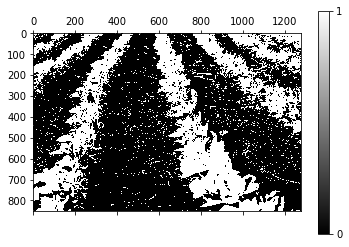

In [21]:
g_min = 150
g_max = 250
img_bin = (g_min < g) & (g < g_max) * 1
# plt.imshow(img_bin, cmap='binary_r')
plt.matshow(img_bin, cmap='binary_r')
plt.colorbar(ticks=[0, 1])
plt.show()

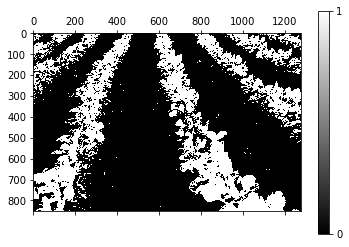

In [22]:
h_min = 40
h_max = 60
img_bin = (h_min < h) & (h < h_max) * 1
plt.matshow(img_bin, cmap='binary_r')
plt.colorbar(ticks=[0, 1])
plt.show()

In [23]:
print(f'Mask ratio is {img_bin.sum()/img_bin.size}')

Mask ratio is 0.2845270369284877


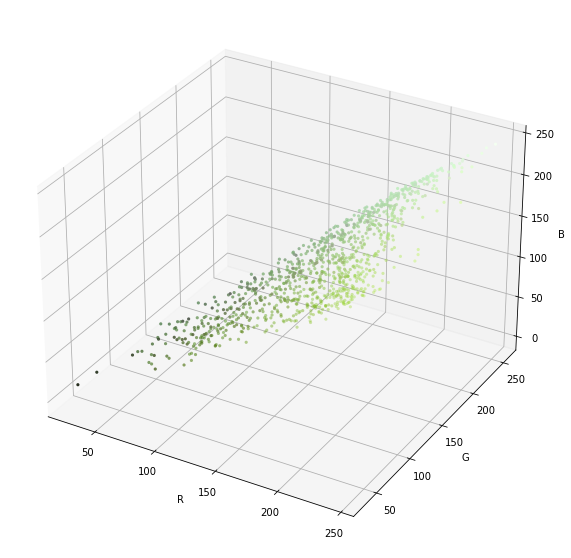

In [24]:
import random
def plot_3d(img, sampling=1000, mask=None, **kwargs):
    xlab, ylab, zlab = 'R', 'G', 'B'
    y,x,z = img.shape
    img_flat = np.reshape(img, (x*y,z))
    if mask is not None:
        mask_flat = np.reshape(mask, (x*y)).astype('bool')
        img_flat = img_flat[mask_flat, :]
        
    if sampling != 0:
        # random sample 
        img_flat = img_flat[np.random.choice(len(img_flat), sampling, replace=False)]
    colors = img_flat / 255
    fig = plt.figure(**kwargs)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=img_flat[:,0],
               ys=img_flat[:,1],
               zs=img_flat[:,2],
               s=10,
               c=colors,
               lw=0)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_zlabel(zlab)
    plt.show()

# matplotlibのインタラクティブプロットを有効化
# うまく行かない場合はコメントアウトしてください。
# %matplotlib widget

plot_3d(img = img_rgb,
        mask=img_bin,
        sampling=1000,
        figsize=(10,10))

In [25]:
# インタラクティブを無効化
%matplotlib inline

## 結果の保存

画像を以下のツールを利用してラベル付けをします。  
https://github.com/yuyu2172/image-labelling-tool  
ラベルは`json`形式のファイルに保存されます。以下で、jsonファイルをバイナリラスタに変換していきます。

In [26]:
import json 

In [27]:
import math
from matplotlib import pyplot as plt
from IPython.display import display, Javascript
from image_labelling_tool import labelling_tool, labelling_tool_jupyter

ModuleNotFoundError: No module named 'image_labelling_tool'

In [ ]:
display(Javascript(labelling_tool_jupyter.LABELLING_TOOL_JUPYTER_JS))

In [ ]:
# Specify our 3 label classes.
# `LabelClass` parameters are: symbolic name, human readable name for UI, and RGB colour as list
label_classes = [labelling_tool.LabelClass('plant', 'Plant', [0, 255, 192]),
                 labelling_tool.LabelClass('soil', 'Soil', [255, 128, 0])]

# Define the tool dimensions
TOOL_WIDTH, TOOL_HEIGHT = 980, 480

# Load in .JPG images from the 'images' directory.
labelled_images = labelling_tool.PersistentLabelledImage.for_directory('data', image_filename_pattern='*.jpg')
print('Loaded {0} images'.format(len(labelled_images)))

labelling_tool_config = {
    'tools': {
        'imageSelector': True,
        'labelClassSelector': True,
        'drawPolyLabel': True,
        'compositeLabel': True,
        'deleteLabel': True
    }
}

In [ ]:
# Create the labelling tool IPython widget and display it
# labeller = labelling_tool_jupyter.ImageLabellingTool(labelled_images=labelled_images, label_classes=label_classes,
#                                                      tool_width=TOOL_WIDTH, tool_height=TOOL_HEIGHT,
#                                                     labelling_tool_config=labelling_tool_config)
# 
# display(labeller)


In [ ]:
labelled_img = labelled_images[1]
labels_2d = labelled_img.render_labels(label_classes=['plant','soil'], pixels_as_vectors=False)
plt.imshow(labels_2d, cmap='gray')
plt.show()


In [ ]:
with open('data/field_2__labels.json') as f:
    data = json.load(f)


In [ ]:
label_plant = [l for l in data['labels'] if l['label_class'] == 'plant']
label_soil = [l for l in data['labels'] if l['label_class'] == 'soil']
print(f'plant: {len(label_plant)}\nsoil: {len(label_soil)}')

In [ ]:
import pprint
pprint.pprint(data)